# PART 1 - Building a Basic NN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from plot_keras_history import plot_history as history
import seaborn as sns

In [2]:
df=pd.read_csv("income_dataset.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


In [4]:
df.isna().any()

age               False
workclass         False
fnlwgt             True
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
income             object
dtype: object

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


AxesSubplot(0.125,0.125;0.775x0.755)


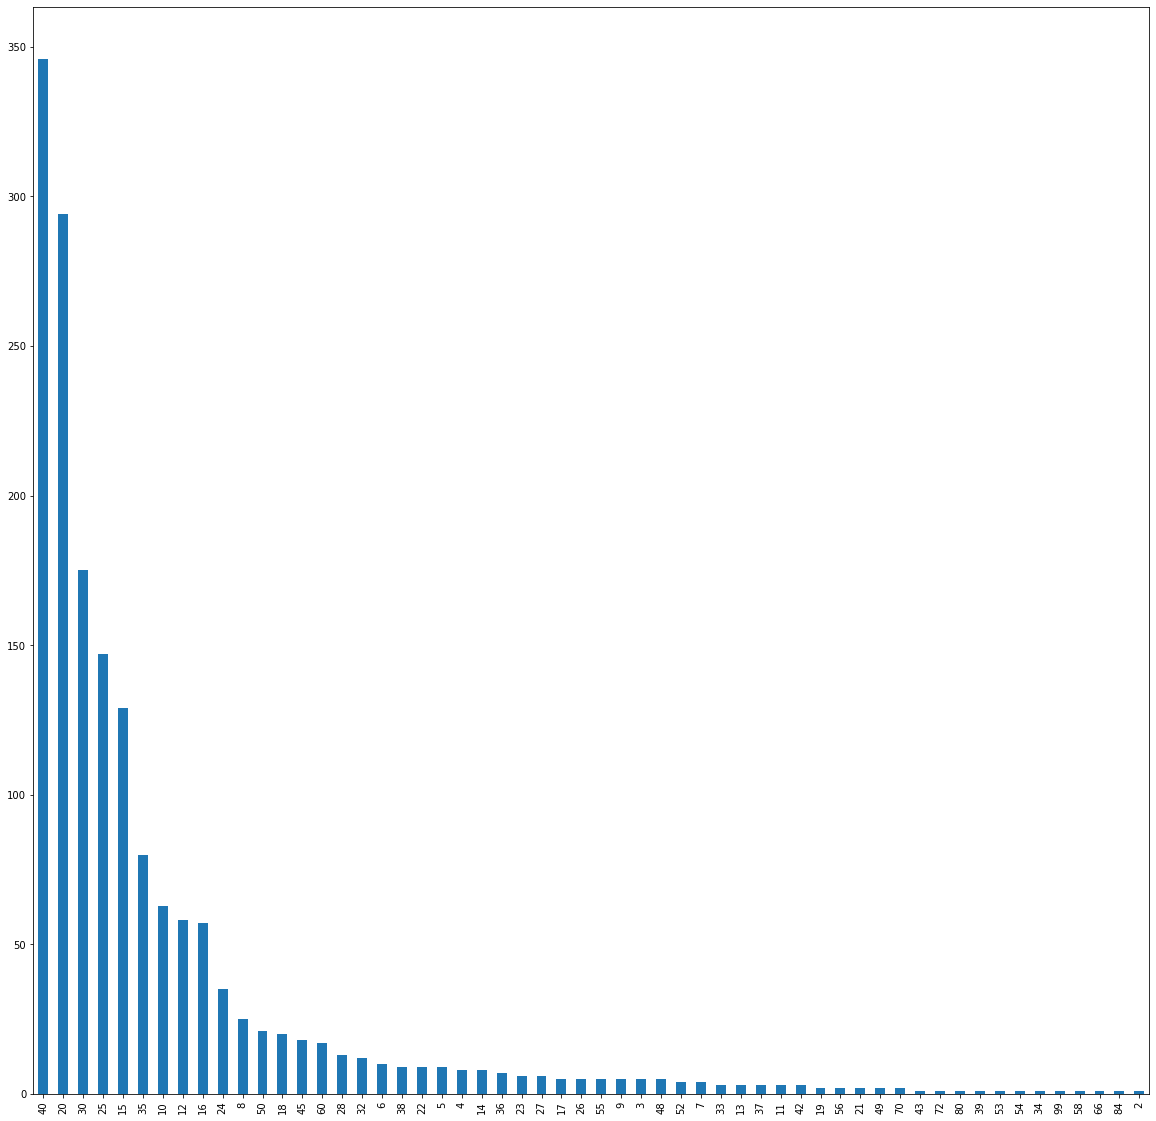

In [9]:

ig=plt.figure(figsize=(20,20))
#print(type(df1['Survived']))
c =df[df['age']<20]['hours.per.week']
#c=df[df['relationship']=='Unmarried']['marital.status']
#c=df[df['education ']=='HS-grad']['relationship']
print(c.value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


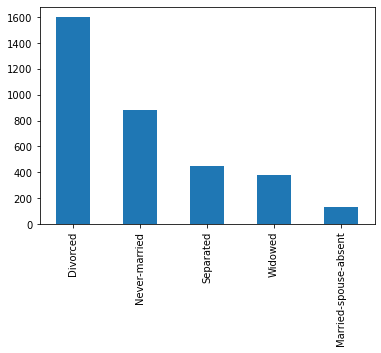

In [10]:
c=df[df['relationship']=='Unmarried']['marital.status']
print(c.value_counts().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


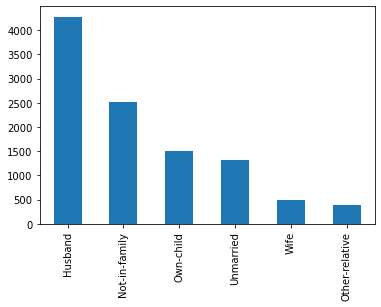

In [11]:
c=df[df['education']=='HS-grad']['relationship']
print(c.value_counts().plot(kind='bar'))

In [12]:
df['workclass'].value_counts()#can drop na or add them to private--check both and tweak acc to accuracy. 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df.drop(df.index[df['workclass'] == '?'], inplace=True) #dropping the null rows. can replace with median later.
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
df['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [15]:
df['education.num'].value_counts()

9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education.num, dtype: int64

In [16]:
df['marital.status'].value_counts()

Married-civ-spouse       14340
Never-married             9917
Divorced                  4259
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [17]:
df['occupation'].value_counts()#important attribute.

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [18]:
df.drop(df.index[df['occupation'] == '?'], inplace=True)
df['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [19]:
df['relationship'].value_counts()

Husband           12704
Not-in-family      7865
Own-child          4525
Unmarried          3271
Wife               1435
Other-relative      918
Name: relationship, dtype: int64

In [20]:
df['capital.gain'].value_counts()#who are the people with non zero capital gain? any pattern

0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
1639         1
7978         1
2387         1
22040        1
Name: capital.gain, Length: 118, dtype: int64

In [21]:
df['capital.loss'].value_counts() #who are the people with non zero capital loss? any pattern?

0       29257
1902      199
1977      167
1887      157
1848       50
        ...  
1844        1
2201        1
1944        1
1411        1
4356        1
Name: capital.loss, Length: 90, dtype: int64

In [22]:
df['hours.per.week'].value_counts()#instinctively most important attribute if target is income. 
                                    #gotta find ways to make best use

40    14525
50     2763
45     1791
60     1441
35     1203
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 94, dtype: int64

In [23]:
df['native.country'].value_counts()#US too freq, can replace ? with US

United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

In [24]:
df['income'].value_counts()

<=50K    23068
>50K      7650
Name: income, dtype: int64

In [25]:
df['native.country']=df['native.country'].replace('?','United-States')

In [26]:
df['native.country'].value_counts()

United-States                 28060
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [27]:
df.head()#has no ? values, education.num column removed.

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K


In [28]:
#normalize the data
def n_data(col):
    return (col - np.min(col)) / (np.max(col) - np.min(col))


In [29]:
df['workclass'] = pd.factorize(df['workclass'])[0] #
df['education'] = pd.factorize(df['education'])[0] 
df['marital.status'] = pd.factorize(df['marital.status'])[0] 
df['occupation'] = pd.factorize(df['occupation'])[0] 
df['relationship'] = pd.factorize(df['relationship'])[0] 
#df['race'] = pd.factorize(df['race'])[0] 
#df['sex'] = pd.factorize(df['sex'])[0] 
df['native.country'] = pd.factorize(df['native.country'])[0]
df['income'] = pd.factorize(df['income'])[0]
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0,186061.0,0,9,0,0,0,0,4356,18,0,0
3,54,0,140359.0,1,4,1,1,1,0,3900,40,0,0
4,41,0,264663.0,2,10,2,2,2,0,3900,40,0,0
5,34,0,216864.0,0,9,1,3,1,0,3770,45,0,0
6,38,0,150601.0,3,6,2,4,1,0,3770,40,0,0


In [30]:
df['age']=n_data(df['age'])
df['workclass']=n_data(df['workclass'])
df['fnlwgt']=n_data(df['fnlwgt']) 
df['education.num']=n_data(df['education.num']) 
df['marital.status']=n_data(df['marital.status'])
df['occupation']=n_data(df['occupation'])
df['relationship']=n_data(df['relationship'])
#df['race']=n_data(df['race'])
#df['sex']=n_data(df['sex'])
df['capital.gain']=n_data(df['capital.gain']) 
df['capital.loss']=n_data(df['capital.loss'])
df['hours.per.week']=n_data(df['hours.per.week'])
df['native.country']=n_data(df['native.country']) 
df['income']=n_data(df['income']) 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,0.0,0.117131,0,0.533333,0.000000,0.000000,0.0,0.0,1.000000,0.173469,0.0,0.0
3,0.506849,0.0,0.086061,1,0.200000,0.166667,0.076923,0.2,0.0,0.895317,0.397959,0.0,0.0
4,0.328767,0.0,0.170568,2,0.600000,0.333333,0.153846,0.4,0.0,0.895317,0.397959,0.0,0.0
5,0.232877,0.0,0.138072,0,0.533333,0.166667,0.230769,0.2,0.0,0.865473,0.448980,0.0,0.0
6,0.287671,0.0,0.093024,3,0.333333,0.333333,0.307692,0.2,0.0,0.865473,0.397959,0.0,0.0


In [31]:
print("age and income",df['age'].corr(df['income']))
print("workclass and income",df['workclass'].corr(df['income']))
print("age and income",df['age'].corr(df['income']))
#print("fnlwgt and income",df['fnlwgt'].corr(df['income']))
#print("education and income",df['education'].corr(df['income']))
print("education.num and income",df['education.num'].corr(df['income']))
#print("age and income",df['age'].corr(df['income']))
print("marital.status and income",df['marital.status'].corr(df['income']))
print("occupation and income",df['occupation'].corr(df['income']))
print("relationship and income",df['relationship'].corr(df['income']))
#print("race and income",df['race'].corr(df['income']))
#print("sex and income",df['sex'].corr(df['income']))
print("capital.gain and income",df['capital.gain'].corr(df['income']))
print("capital.loss and income",df['capital.loss'].corr(df['income']))
print("hours.per.week and income",df['hours.per.week'].corr(df['income']))
#print("native.country and income",df['native.country'].corr(df['income']))

age and income 0.24243082574642852
workclass and income 0.11422454226082504
age and income 0.24243082574642852
education.num and income 0.3346403310155085
marital.status and income 0.29867226091773286
occupation and income -0.12631081107640874
relationship and income 0.3827559741595463
capital.gain and income 0.22187118645237924
capital.loss and income 0.15146096458768385
hours.per.week and income 0.22854659606942224


In [32]:
df=df.drop(['education','fnlwgt','native.country'],axis=1)

In [33]:
x=df.iloc[:,0:-1].values #independent variable
y=df.iloc[:,-1].values #dependent
print(x[1],y)

[0.50684932 0.         0.2        0.16666667 0.07692308 0.2
 0.         0.8953168  0.39795918] [0. 0. 0. ... 1. 0. 0.]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12)

In [35]:
model = Sequential()
model.add(Dense(25, input_dim=x_train.shape[1], activation="relu"))
#model.add(Dropout(0.1))
model.add(Dense(20, activation="relu"))
#model.add(Dropout(0.2))
#model.add(Dense(8,activation="tanh"))
#model.add(Dense(20,activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                250       
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [37]:
x_train.shape

(27646, 9)

In [38]:
y_train.shape

(27646,)

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)

In [40]:
loss, accuracy = model.evaluate(x_test,y_test)

96/96 [==============================] - 0s 943us/step - loss: 0.1032 - accuracy: 0.8503


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

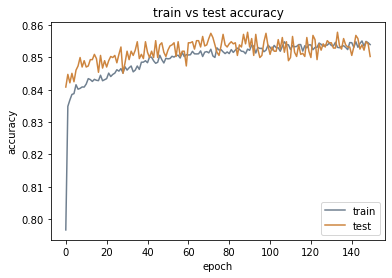

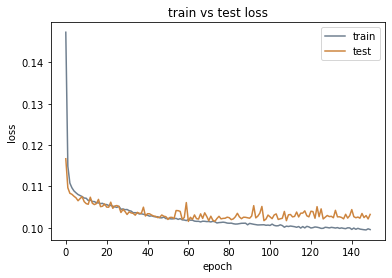

96/96 [==============================] - 0s 888us/step - loss: 0.1032 - accuracy: 0.8503
accuracy= 0.8502604365348816 loss 0.10323434323072433


In [42]:
plt.plot(history.history['accuracy'],color='slategray')
plt.plot(history.history['val_accuracy'], color='peru')
plt.legend(['train','test'],loc='lower right')
plt.title('train vs test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['loss'],color='slategray')
#plt.legend(['train'], loc='upper right')
plt.plot(history.history['val_loss'],color='peru')
plt.legend(['train','test'],loc='upper right')
plt.title('train vs test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
loss, accuracy = model.evaluate(x_test,y_test)
print("accuracy=",accuracy,"loss",loss)

References:
1) UB learns
2) keras documentation
3) stackoverflow